# MGTA 415 Project

### Load the data

https://amazon-reviews-2023.github.io/

In [1]:
import gzip
from collections import defaultdict
import math
import numpy as np
import string
import string
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVDpp
import json
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [2]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [ ]:
data = []
for i, l in enumerate(parse("./Books.jsonl.gz")):
    if i >= 20000:
        break
    data.append(l)

filtered_data = [
    {"rating": entry["rating"], "text": entry["text"]}
    for entry in data
    if "rating" in entry and "text" in entry
]

# training (80%) and testing (20%)
train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 16000
Testing data size: 4000


In [4]:
data

[{'rating': 1.0,
  'title': 'Not a watercolor book! Seems like copies imo.',
  'text': 'It is definitely not a watercolor book.  The paper bucked completely.  The pages honestly appear to be photo copies of other pictures. I say that bc if you look at the seal pics you can see the tell tale line at the bottom of the page.  As someone who has made many photocopies of pages in my time so I could try out different colors & mediums that black line is a dead giveaway to me. It’s on other pages too.  The entire book just seems off. Nothing is sharp & clear. There is what looks like toner dust on all the pages making them look muddy.  There are no sharp lines & there is no clear definition.  At least there isn’t in my copy.  And the Coloring Book for Adult on the bottom of the front cover annoys me. Why is it singular & not plural?  They usually say coloring book for kids or coloring book for kids & adults or coloring book for adults- plural.  Lol  Plus it would work for kids if you can get o

### Distribution

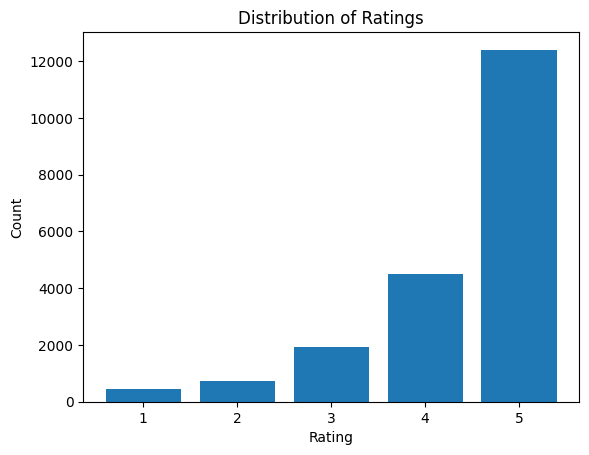

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

ratings = [entry['rating'] for entry in data if 'rating' in entry]

rating_counts = Counter(ratings)

sorted_ratings = sorted(rating_counts.keys())
sorted_counts = [rating_counts[r] for r in sorted_ratings]

plt.bar(sorted_ratings, sorted_counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(sorted_ratings)
plt.show()


### Word Freq & word cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


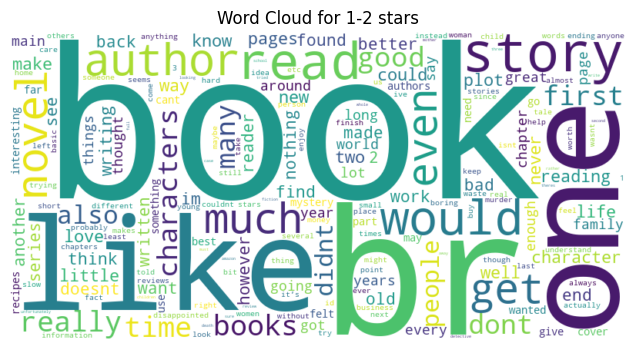

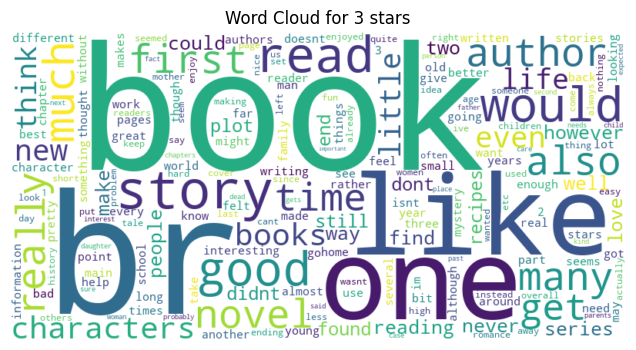

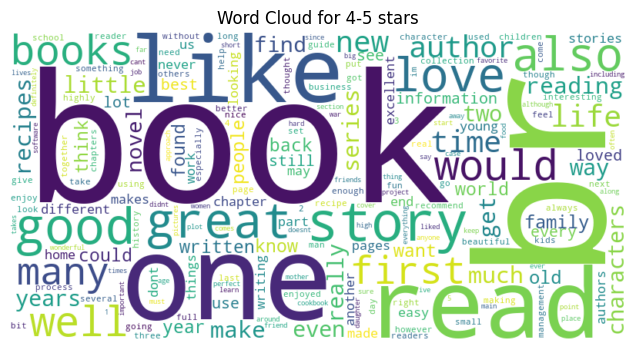

In [ ]:
import nltk
import string
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Convert text to lowercase, remove punctuation & stopwords, and tokenize."""
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return [word for word in words if word not in stop_words]

def get_word_frequency(texts):
    """Compute word frequency from a list of texts."""
    all_words = []
    for text in texts:
        all_words.extend(preprocess_text(text))
    return Counter(all_words)

def analyze_sentiment(text):
    """Calculate sentiment polarity using TextBlob."""
    return TextBlob(text).sentiment.polarity  # Ranges from -1 (negative) to +1 (positive)

# Group texts by rating categories
rating_categories = {
    "1-2 stars": [],
    "3 stars": [],
    "4-5 stars": []
}

for entry in train_data:
    rating = entry["rating"]
    text = entry["text"]

    if rating in [1, 2]:
        rating_categories["1-2 stars"].append(text)
    elif rating == 3:
        rating_categories["3 stars"].append(text)
    else:  # 4 or 5 stars
        rating_categories["4-5 stars"].append(text)

for category, texts in rating_categories.items():
    word_freq = get_word_frequency(texts)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")

    plt.savefig(f"{category.replace(' ', '_')}_wordcloud.png", dpi=300)
    plt.show()


### Sentiment Analysis Distribution by Rating

In [ ]:

# Group texts and sentiment scores by rating
rating_texts = {}
rating_sentiments = {}

def plot_word_cloud(word_freq, title):
    """Generate and display a word cloud."""
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

for entry in train_data:
    rating = entry["rating"]
    text = entry["text"]
    
    rating_texts.setdefault(rating, []).append(text)
    rating_sentiments.setdefault(rating, []).append(analyze_sentiment(text))

# Generate word frequency and word cloud for each rating
for rating, texts in rating_texts.items():
    word_freq = get_word_frequency(texts)
    plot_word_cloud(word_freq, f"Word Cloud for Rating {rating}")

sorted_ratings = sorted(rating_sentiments.keys())

# Plot Sentiment Distribution in Sorted Order
plt.figure(figsize=(10, 6))
for rating in sorted_ratings:
    sns.kdeplot(rating_sentiments[rating], label=f"Rating {rating}", fill=True)

plt.axvline(x=0, color='black', linestyle='--', label="Neutral Sentiment")
plt.xlabel("Sentiment Polarity (-1 to 1)")
plt.ylabel("Density")
plt.title("Sentiment Analysis Distribution by Rating (Sorted Order)")
plt.legend()
plt.show()

### Average rating

In [6]:
# Extract ratings from data
ratings = [entry['rating'] for entry in data if 'rating' in entry]

# Compute the average rating
average_rating = sum(ratings) / len(ratings) if ratings else 0

print(f"Average Rating: {average_rating:.2f}")


Average Rating: 4.35


### Get col text and rating

In [7]:
filtered_data = [
    {"rating": entry["rating"], "text": entry["text"]}
    for entry in data
    if "rating" in entry and "text" in entry
]

# Let's print out the first few entries to verify the result:
for item in filtered_data[:20]:
    print(item)

{'rating': 1.0, 'text': 'It is definitely not a watercolor book.  The paper bucked completely.  The pages honestly appear to be photo copies of other pictures. I say that bc if you look at the seal pics you can see the tell tale line at the bottom of the page.  As someone who has made many photocopies of pages in my time so I could try out different colors & mediums that black line is a dead giveaway to me. It’s on other pages too.  The entire book just seems off. Nothing is sharp & clear. There is what looks like toner dust on all the pages making them look muddy.  There are no sharp lines & there is no clear definition.  At least there isn’t in my copy.  And the Coloring Book for Adult on the bottom of the front cover annoys me. Why is it singular & not plural?  They usually say coloring book for kids or coloring book for kids & adults or coloring book for adults- plural.  Lol  Plus it would work for kids if you can get over the grey scale nature of it.  Personally I’m not going to w

### Baseline, predict all with Mean

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Compute the mean rating from the training data
mean_rating = np.mean([entry["rating"] for entry in train_data])

# Predict the mean rating for all test data
y_test = [entry["rating"] for entry in test_data]  # True ratings
y_pred = [mean_rating] * len(y_test)  # Baseline predictions (constant mean)

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Baseline Mean Rating: {mean_rating:.2f}")
print(f"Baseline MSE: {mse:.4f}")

Baseline Mean Rating: 4.34
Baseline MSE: 0.9590


### NLTK and spacy preprocessor

In [11]:
import en_core_web_sm
nlp_processor = en_core_web_sm.load()

# return a list of tokens
def pre_processing_by_spacy(doc, lemma = True, need_sent = False):
    doc_class = nlp_processor(doc)
    tokens = []
    # step 1: get sentences
    for sent in doc_class.sents:
        # step 2: get tokens
        # step 3 (optional): lemma
        if lemma:
            words = [token.lemma_ for token in sent]
        else:
            words = [token.text for token in sent]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    return tokens


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer 


ps = PorterStemmer() 

# return a list of tokens
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # step 1: get sentences
    sentences = sent_tokenize(doc)
    # step 2: get tokens
    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 (optional): stemming
        if stemming:
            words = [ps.stem(word) for word in words]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    return tokens

In [ ]:
# Extract text and ratings from training and test sets
X_train_nltk = [" ".join(pre_processing_by_nltk(entry["text"])) for entry in train_data]
X_test_nltk = [" ".join(pre_processing_by_nltk(entry["text"])) for entry in test_data]

X_train_spacy = [" ".join(pre_processing_by_spacy(entry["text"])) for entry in train_data]
X_test_spacy = [" ".join(pre_processing_by_spacy(entry["text"])) for entry in test_data]

y_train = [entry["rating"] for entry in train_data]
y_test = [entry["rating"] for entry in test_data]

### Save and reload the preprocess data

In [ ]:
import pickle

# Define the file names
file_names = {
    "X_train_nltk": "X_train_nltk.pkl",
    "X_test_nltk": "X_test_nltk.pkl",
    "X_train_spacy": "X_train_spacy.pkl",
    "X_test_spacy": "X_test_spacy.pkl",
    "y_train": "y_train.pkl",
    "y_test": "y_test.pkl",
}

# Save the variables to disk
for var_name, file_name in file_names.items():
    with open(file_name, 'wb') as f:
        pickle.dump(globals()[var_name], f)

# List the saved files
file_names


{'X_train_nltk': 'X_train_nltk.pkl',
 'X_test_nltk': 'X_test_nltk.pkl',
 'X_train_spacy': 'X_train_spacy.pkl',
 'X_test_spacy': 'X_test_spacy.pkl',
 'y_train': 'y_train.pkl',
 'y_test': 'y_test.pkl'}

In [11]:
import pickle

# Define the file names
file_names = {
    "X_train_nltk": "X_train_nltk.pkl",
    "X_test_nltk": "X_test_nltk.pkl",
    "X_train_spacy": "X_train_spacy.pkl",
    "X_test_spacy": "X_test_spacy.pkl",
    "y_train": "y_train.pkl",
    "y_test": "y_test.pkl",
}

# Load the variables from disk
loaded_data = {}
for var_name, file_name in file_names.items():
    with open(file_name, 'rb') as f:
        loaded_data[var_name] = pickle.load(f)

# Assign variables back
X_train_nltk = loaded_data["X_train_nltk"]
X_test_nltk = loaded_data["X_test_nltk"]
X_train_spacy = loaded_data["X_train_spacy"]
X_test_spacy = loaded_data["X_test_spacy"]
y_train = loaded_data["y_train"]
y_test = loaded_data["y_test"]

# Now you can use the loaded variables as before
print("Data loaded successfully.")


Data loaded successfully.


### Linear Regression and RandomForest

In [34]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Extract text and ratings from training and test sets
X_train_nltk = [" ".join(pre_processing_by_nltk(entry["text"])) for entry in train_data]
X_test_nltk = [" ".join(pre_processing_by_nltk(entry["text"])) for entry in test_data]

X_train_spacy = [" ".join(pre_processing_by_spacy(entry["text"])) for entry in train_data]
X_test_spacy = [" ".join(pre_processing_by_spacy(entry["text"])) for entry in test_data]

y_train = [entry["rating"] for entry in train_data]
y_test = [entry["rating"] for entry in test_data]




In [ ]:

# CountVectorizer
vectorizer = CountVectorizer()

# Convert text to feature vectors
X_train_nltk_vec = vectorizer.fit_transform(X_train_nltk)
X_test_nltk_vec = vectorizer.transform(X_test_nltk)

X_train_spacy_vec = vectorizer.fit_transform(X_train_spacy)
X_test_spacy_vec = vectorizer.transform(X_test_spacy)


In [ ]:

models = {
    "Linear Regression (NLTK)": LinearRegression(),
    "Random Forest (NLTK)": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression (spaCy)": LinearRegression(),
    "Random Forest (spaCy)": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = {}

for model_name, model in models.items():
    if "NLTK" in model_name:
        X_train_vec, X_test_vec = X_train_nltk_vec, X_test_nltk_vec
    else:
        X_train_vec, X_test_vec = X_train_spacy_vec, X_test_spacy_vec

    # Train
    model.fit(X_train_vec, y_train)

    # predictions
    y_pred = model.predict(X_test_vec)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

    print(f"{model_name} - MSE: {mse:.4f}")

Linear Regression (NLTK) - MSE: 126.8262
Random Forest (NLTK) - MSE: 0.7304
Linear Regression (spaCy) - MSE: 118.9764
Random Forest (spaCy) - MSE: 0.6761


### TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer
vectorizer_nltk = TfidfVectorizer()
vectorizer_spacy = TfidfVectorizer()

# TF-IDF normalization
X_train_nltk_vec = vectorizer_nltk.fit_transform(X_train_nltk)
X_test_nltk_vec = vectorizer_nltk.transform(X_test_nltk)

X_train_spacy_vec = vectorizer_spacy.fit_transform(X_train_spacy)
X_test_spacy_vec = vectorizer_spacy.transform(X_test_spacy)


In [ ]:
models = {
    "Linear Regression (NLTK)": LinearRegression(),
    "Random Forest (NLTK)": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression (spaCy)": LinearRegression(),
    "Random Forest (spaCy)": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = {}

for model_name, model in models.items():
    if "NLTK" in model_name:
        X_train_vec, X_test_vec = X_train_nltk_vec, X_test_nltk_vec
    else:
        X_train_vec, X_test_vec = X_train_spacy_vec, X_test_spacy_vec

    # train
    model.fit(X_train_vec, y_train)

    # predictions
    y_pred = model.predict(X_test_vec)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

    print(f"{model_name} - MSE: {mse:.4f}")

Linear Regression (NLTK) - MSE: 4.0765
Random Forest (NLTK) - MSE: 0.7051
Linear Regression (spaCy) - MSE: 6.4056
Random Forest (spaCy) - MSE: 0.6568


### Optimization for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from itertools import product

# hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# all combinations of hyperparameters
param_combinations = list(product(
    param_grid["n_estimators"],
    param_grid["max_depth"],
    param_grid["min_samples_split"],
    param_grid["min_samples_leaf"]
))

results = {}

for params in param_combinations:
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    model_name = f"RF (spaCy) - n={n_estimators}, depth={max_depth}, split={min_samples_split}, leaf={min_samples_leaf}"

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train 
    model.fit(X_train_spacy_vec, y_train)

    # predictions
    y_pred = model.predict(X_test_spacy_vec)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse


In [ ]:
# hyperparameter setting
best_model = min(results, key=results.get)
print(f"Best model: {best_model} with MSE: {results[best_model]:.4f}")


Best model: RF (spaCy) - n=100, depth=None, split=2, leaf=5 with MSE: 0.6459


### LSTM

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


### LSTM with NLTK preprocessor


#### Data process

In [ ]:
X_train_texts = [entry for entry in X_train_nltk]
X_test_texts = [entry for entry in X_test_nltk]
y_train = np.array([entry["rating"] for entry in train_data])
y_test = np.array([entry["rating"] for entry in test_data])

# Hyperparameters
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200

# Tokenizer to convert words to indices
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad sequences to make them uniform length
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')


#### Model

In [ ]:
# model
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128, return_sequences=True),
    Dropout(0.01),
    LSTM(64),
    Dropout(0.01),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (predicts rating)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 200, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                

#### Training with early exist


Epoch 1/20


1000/1000 [==============================] - 81s 78ms/step - loss: 1.0991 - mse: 1.0991 - val_loss: 0.9182 - val_mse: 0.9182

Epoch 2/20
1000/1000 [==============================] - 77s 77ms/step - loss: 0.9254 - mse: 0.9254 - val_loss: 0.8884 - val_mse: 0.8884

Epoch 3/20
1000/1000 [==============================] - 76s 76ms/step - loss: 0.8666 - mse: 0.8666 - val_loss: 0.9149 - val_mse: 0.9149

Epoch 4/20
1000/1000 [==============================] - 75s 75ms/step - loss: 0.6864 - mse: 0.6864 - val_loss: 0.6752 - val_mse: 0.6752

Epoch 5/20
1000/1000 [==============================] - 75s 75ms/step - loss: 0.5366 - mse: 0.5366 - val_loss: 0.6534 - val_mse: 0.6534

Epoch 6/20
1000/1000 [==============================] - 75s 75ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.6377 - val_mse: 0.6377

Epoch 7/20
1000/1000 [==============================] - 75s 75ms/step - loss: 0.3174 - mse: 0.3174 - val_loss: 0.6772 - val_mse: 0.6772

Epoch 8/20
1000/1000 [================

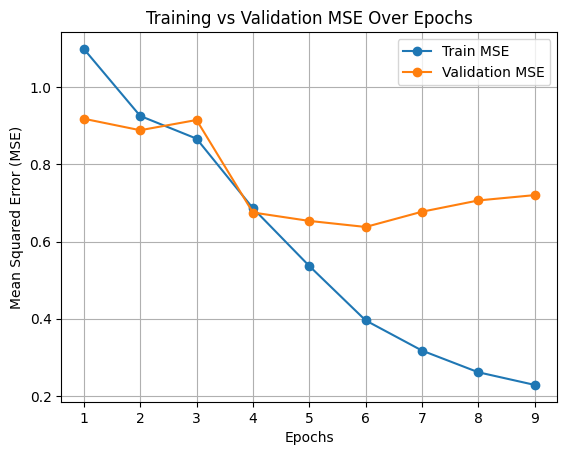

In [ ]:
import matplotlib.pyplot as plt

MAX_EPOCHS = 20 
patience = 3 
best_val_loss = float('inf')
epochs_no_improve = 0 

train_mse_list = []
val_mse_list = []

# Train one epoch at a time
for epoch in range(MAX_EPOCHS):
    print(f"\nEpoch {epoch + 1}/{MAX_EPOCHS}")

    history = model.fit(
        X_train_padded, y_train,
        epochs=1,
        batch_size=16,
        validation_data=(X_test_padded, y_test),
        verbose=1
    )

    train_mse = history.history['mse'][0]
    val_mse = history.history['val_mse'][0]

    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

    # Check if validation loss improved
    if val_mse < best_val_loss:
        best_val_loss = val_mse
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1 

    # Stop if no improvement for 'patience' epochs
    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch + 1} epochs. Best validation loss: {best_val_loss:.4f}")
        break

plt.plot(range(1, len(train_mse_list) + 1), train_mse_list, label="Train MSE", marker='o')
plt.plot(range(1, len(val_mse_list) + 1), val_mse_list, label="Validation MSE", marker='o')

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation MSE Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


### LSTM with spacy preprocessor

#### Data process

In [ ]:

X_train_texts = [entry for entry in X_train_spacy]
X_test_texts = [entry for entry in X_test_spacy]
y_train = np.array([entry["rating"] for entry in train_data])
y_test = np.array([entry["rating"] for entry in test_data])

# Hyperparameters
MAX_VOCAB_SIZE = 10000  # Vocabulary size
MAX_SEQUENCE_LENGTH = 200  # Max words in a review

# Tokenizer to convert words to indices
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad sequences to make them uniform length
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

#### Model

In [ ]:
# LSTM model
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64, return_sequences=True),
    Dropout(0.01),
    LSTM(32),
    Dropout(0.01),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer (predicts rating)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 lstm_40 (LSTM)              (None, 200, 64)           49408     
                                                                 
 dropout_40 (Dropout)        (None, 200, 64)           0         
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_41 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)               

#### Training with early exist


Epoch 1/20
500/500 [==============================] - 34s 69ms/step - loss: 0.7916 - mse: 0.7916 - val_loss: 0.9292 - val_mse: 0.9292

Epoch 2/20
500/500 [==============================] - 36s 73ms/step - loss: 0.7731 - mse: 0.7731 - val_loss: 0.9452 - val_mse: 0.9452

Epoch 3/20
500/500 [==============================] - 34s 67ms/step - loss: 0.7451 - mse: 0.7451 - val_loss: 0.9024 - val_mse: 0.9024

Epoch 4/20
500/500 [==============================] - 33s 65ms/step - loss: 0.6889 - mse: 0.6889 - val_loss: 1.0150 - val_mse: 1.0150

Epoch 5/20
500/500 [==============================] - 33s 65ms/step - loss: 0.6861 - mse: 0.6861 - val_loss: 0.7630 - val_mse: 0.7630

Epoch 6/20
500/500 [==============================] - 32s 65ms/step - loss: 0.4610 - mse: 0.4610 - val_loss: 0.6921 - val_mse: 0.6921

Epoch 7/20
500/500 [==============================] - 33s 65ms/step - loss: 0.3306 - mse: 0.3306 - val_loss: 0.6861 - val_mse: 0.6861

Epoch 8/20
500/500 [==============================] - 

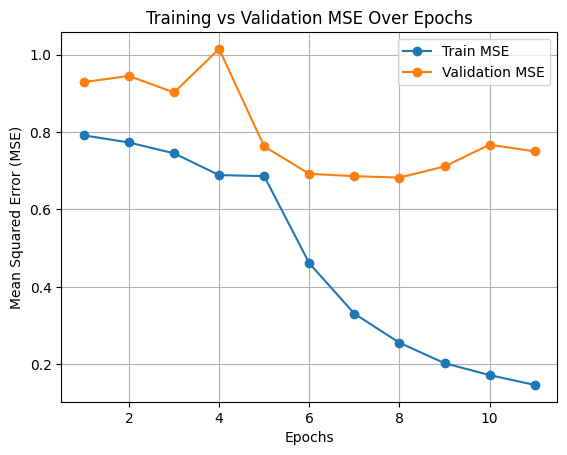

In [ ]:
import matplotlib.pyplot as plt

MAX_EPOCHS = 20  # Maximum epochs
patience = 3  # Early stopping patience
best_val_loss = float('inf')
epochs_no_improve = 0  # Counter for early stopping

train_mse_list = []
val_mse_list = []

# Train one epoch at a time
for epoch in range(MAX_EPOCHS):
    print(f"\nEpoch {epoch + 1}/{MAX_EPOCHS}")

    history = model.fit(
        X_train_padded, y_train,
        epochs=1,  # Train only one epoch per iteration
        batch_size=32,
        validation_data=(X_test_padded, y_test),
        verbose=1
    )

    train_mse = history.history['mse'][0]
    val_mse = history.history['val_mse'][0]

    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

    # Check if validation loss improved
    if val_mse < best_val_loss:
        best_val_loss = val_mse
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Stop if no improvement for 'patience' epochs
    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch + 1} epochs. Best validation loss: {best_val_loss:.4f}")
        break

plt.plot(range(1, len(train_mse_list) + 1), train_mse_list, label="Train MSE", marker='o')
plt.plot(range(1, len(val_mse_list) + 1), val_mse_list, label="Validation MSE", marker='o')

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation MSE Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


### BERT

In [ ]:

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm

class ReviewDataset(Dataset):
    def __init__(self, texts, ratings, tokenizer, max_length):
        self.texts = texts
        self.ratings = ratings
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        rating = self.ratings[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(rating, dtype=torch.float)
        }

# Hyperparameters
MAX_LENGTH = 128
BATCH_SIZE = 8
EPOCHS = 3
LEARNING_RATE = 2e-5

# BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_texts = [entry["text"] for entry in train_data]
test_texts = [entry["text"] for entry in test_data]
train_ratings = [entry["rating"] for entry in train_data]
test_ratings = [entry["rating"] for entry in test_data]

train_dataset = ReviewDataset(train_texts, train_ratings, tokenizer, MAX_LENGTH)
test_dataset = ReviewDataset(test_texts, test_ratings, tokenizer, MAX_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
loss_fn = torch.nn.MSELoss()

# training
model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}')
    
    for batch in progress_bar:
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = outputs.logits.squeeze()
        
        loss = loss_fn(predictions, labels)
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
        progress_bar.set_postfix({'loss': loss.item()})
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} Average Training Loss: {avg_loss:.4f}")

# evualation
model.eval()
test_preds = []
test_true = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].cpu().numpy()
        
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = outputs.logits.squeeze().cpu().numpy()
        
        test_preds.extend(predictions)
        test_true.extend(labels)

# MSE
mse = mean_squared_error(test_true, test_preds)
print(f"BERT Model MSE: {mse:.4f}")



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 2000/2000 [03:36<00:00,  9.24it/s, loss=0.658]  


Epoch 1 Average Training Loss: 0.6389


Epoch 2/3: 100%|██████████| 2000/2000 [03:38<00:00,  9.15it/s, loss=0.299]  


Epoch 2 Average Training Loss: 0.3263


Epoch 3/3: 100%|██████████| 2000/2000 [03:36<00:00,  9.26it/s, loss=0.287]  


Epoch 3 Average Training Loss: 0.2190


100%|██████████| 500/500 [00:19<00:00, 25.52it/s]

BERT Model MSE: 0.4237


## Testing with www.wuxiaworld.com

## Some sentences we find from www.wuxiaworld.com and manually mark them 

### Positive  
"kay the image of deculein standing on a snowy rocky outcrop in a long coat whipping about in the wind is just... so exquisitely pituresque"
,
"This just seems way better overall, specially because he started dissecting his attributes. He could use it to create the strongest mental power related magic to fight demons with, or even just implement mental damage to his usual attacks."
,
"Thanks for the chapter :-)"
,
"Enjoyed reading the chapter very much."

### Neutral
"Aw.....I wanted his buds to go with him...he's so lonely!"
,
"I'm finally all caught up, been busy ever since the start of the year... "
,

"That sly fox...of course Luo would be ok even after getting a hole through his chest lol"

### Negtive
"I feel like this is unnecessary. He has never had a time where his physical or mental endurance was lacking. I can’t picture the so-called next level."
,
"Is duct tape really that legendary? I don’t get it…."
,
"He Yong might very well not know how to count, he is after all a martial blockhead and has taken many hits to the brain"
,
"It really bugs me that he always just gives the things away, he doesn't leave them as legacies like everything HE foumd, he doesn't set theme up in a trial that is designed to temper the growth of the younger generations... Just tossed his junk to the needy and leaves. "
,
"I only need to read the title to summarize the chapter.. i dont even need to read it"
,
"Wow this novel is still a thing ? I just checked the most read in this site and didn't expect MGA in the top. LoL. 
I've read the raw but already abandoned the novel months ago because the shitty characters development in this novel. No maturity and so many stupid people just to make the MC looks great but in reality this is still stupid and unnecessary.
No plot, no creativity, no consistency, many plot holes, fight like a math no skill just pure math but more mockery, useless words in a whole chapter, shiity writing skill i bet you guys can't remember the name of his friends anymore and even his girlfriends."

## Postive test sentence:

In [ ]:
test_data_postive = ["kay the image of deculein standing on a snowy rocky outcrop in a long coat whipping about in the wind is just... so exquisitely pituresque, it's so good!"
,
"This just seems way better overall, specially because he started dissecting his attributes. He could use it to create the strongest mental power related magic to fight demons with, or even just implement mental damage to his usual attacks."
,
"Thanks for the chapter :-)"
,
"Enjoyed reading the chapter very much."]

X_real_test = [" ".join(pre_processing_by_nltk(text)) for text in test_data_postive]
# Convert new input to sequences using the same tokenizer
new_sequences = tokenizer.texts_to_sequences(X_real_test)

new_padded_sequences = pad_sequences(new_sequences, maxlen=X_train_padded.shape[1], padding='post')

predictions = model.predict(new_padded_sequences)

1/1 [==============================] - 0s 39ms/step


In [24]:
predictions

array([[4.525612 ],
       [4.208149 ],
       [4.7300425],
       [4.6190324]], dtype=float32)

### Neutral test sentence: 

In [ ]:
test_data_neutral = ["Aw.....I wanted his buds to go with him...he's so lonely!"
,
"I'm finally all caught up, been busy ever since the start of the year... "
,

"That sly fox...of course Luo would be ok even after getting a hole through his chest lol" ]

X_real_test = [" ".join(pre_processing_by_nltk(text)) for text in test_data_neutral]
# Convert new input to sequences using the same tokenizer
new_sequences = tokenizer.texts_to_sequences(X_real_test)

new_padded_sequences = pad_sequences(new_sequences, maxlen=X_train_padded.shape[1], padding='post')

predictions = model.predict(new_padded_sequences)

1/1 [==============================] - 0s 33ms/step


In [42]:
predictions

array([[2.9653027],
       [4.735861 ],
       [2.3948398]], dtype=float32)

## Negative test sentence: 

In [ ]:
test_data_Negative = ["I feel like this is unnecessary. He has never had a time where his physical or mental endurance was lacking. I can’t picture the so-called next level."
,
"Is duct tape really that legendary? I don’t get it…."
,
"He Yong might very well not know how to count, he is after all a martial blockhead and has taken many hits to the brain"
,
"It really bugs me that he always just gives the things away, he doesn't leave them as legacies like everything HE foumd, he doesn't set theme up in a trial that is designed to temper the growth of the younger generations... Just tossed his junk to the needy and leaves. "
,
"I only need to read the title to summarize the chapter.. i dont even need to read it"
,
"Wow this novel is still a thing ? I just checked the most read in this site and didn't expect MGA in the top. LoL. I've read the raw but already abandoned the novel months ago because the shitty characters development in this novel. No maturity and so many stupid people just to make the MC looks great but in reality this is still stupid and unnecessary.No plot, no creativity, no consistency, many plot holes, fight like a math no skill just pure math but more mockery, useless words in a whole chapter, shiity writing skill i bet you guys can't remember the name of his friends anymore and even his girlfriends."]

X_real_test = [" ".join(pre_processing_by_nltk(text)) for text in test_data_Negative]
# Convert new input to sequences using the same tokenizer
new_sequences = tokenizer.texts_to_sequences(X_real_test)

new_padded_sequences = pad_sequences(new_sequences, maxlen=X_train_padded.shape[1], padding='post')

predictions = model.predict(new_padded_sequences)

1/1 [==============================] - 0s 42ms/step


In [40]:
predictions

array([[2.231214 ],
       [3.3907878],
       [2.187003 ],
       [2.0622756],
       [4.438251 ],
       [1.4369215]], dtype=float32)